In [69]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np


In [70]:

# Wasp-136

# Open the file using a context manager to ensure it closes properly
with fits.open("/Users/Aidan Moran-Bates/Downloads/ASTR502/ADP.2020-06-10T14_26_50.822.fits") as hdul:
    # See a summary of the file structure (extensions, dimensions, etc.)
    hdul.info()
    
    # Access the primary HDU (usually index 0)
    primary_hdu = hdul[0]
    
    # Access data (as a NumPy array) and header (as a dict-like object)
    data = primary_hdu.data
    header = primary_hdu.header
    
    # Access specific header keywords
    exposure_time = header['EXPTIME']

    data_table = Table(hdul[1].data)
    
    # Access columns by name
    wavelengths = data_table['WAVE'][0]
    flux = data_table['FLUX'][0]

    print(wavelengths)
    print(flux)



Filename: /Users/Aidan Moran-Bates/Downloads/ASTR502/ADP.2020-06-10T14_26_50.822.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU    1014   ()      
  1  SPECTRUM      1 BinTableHDU     63   1R x 5C   [132708D, 132708E, 132708E, 132708E, 132708E]   
[4726.42974743 4726.44397912 4726.45821081 ... 6835.03428168 6835.05110175
 6835.06792181]
[0. 0. 0. ... 0. 0. 0.]


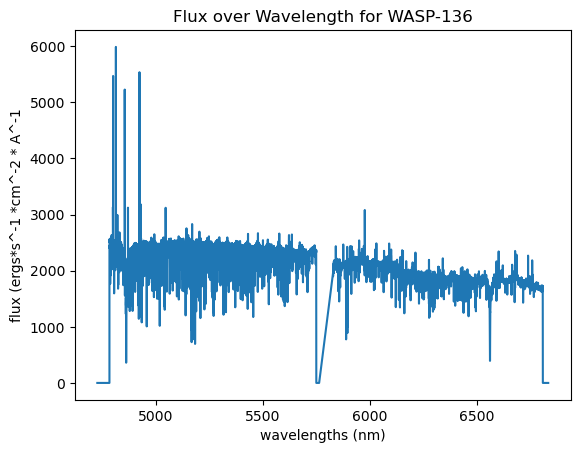

In [71]:
# Plotting the wavelength and flux of the star.

plt.plot(wavelengths,flux)
plt.xlabel('wavelengths (nm)')
plt.ylabel('flux (ergs*s^-1 *cm^-2 * A^-1')
plt.title('Flux over Wavelength for WASP-136')
plt.show()


In [72]:
# Trying to download a fits file from ESO using astroquery

from astroquery.eso import Eso
eso = Eso()
Eso.clear_cache()


# Is the example code from the ESO queries website but it doesn't work
table = eso.query_instrument('midi',
                    column_filters={
                        'object': 'NGC4151',
                        'date_obs': "<='2008-01-01'"
                    },
                    columns=['object', 'date_obs', 'DP.ID'])
table_headers = eso.get_headers(table["DP.ID"])
len(table_headers.columns)
336
table_headers.pprint()

# Had to change "dp_id" to "DP.ID" to work

data_files = eso.retrieve_data(table['DP.ID'][:2])

# Getting an UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U28'), dtype('float64')) -> None


           DP.ID             SIMPLE ... HIERARCH ESO ISS CHOP THROW
---------------------------- ------ ... ---------------------------
MIDI.2004-04-07T01:39:15.000   True ...                         0.0
MIDI.2004-04-07T01:40:13.000   True ...                         0.0
MIDI.2004-04-07T01:42:59.000   True ...                         0.0
MIDI.2004-04-07T01:46:06.000   True ...                         0.0
MIDI.2004-04-07T01:46:59.148   True ...                         0.0
MIDI.2004-04-07T01:47:47.223   True ...                         0.0
MIDI.2004-04-07T01:48:49.000   True ...                         0.0
MIDI.2004-04-07T01:49:42.148   True ...                         0.0
MIDI.2004-04-07T01:50:35.297   True ...                         0.0
MIDI.2004-04-07T01:53:54.000   True ...                         0.0
                         ...    ... ...                         ...
MIDI.2004-04-09T00:57:23.044   True ...                         0.0
MIDI.2004-04-09T00:59:15.000   True ...         

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U28'), dtype('float64')) -> None

In [73]:
# Another way via the ESO Queries website is to use eso.query_surveys

table = eso.query_surveys(surveys='HARPS', target_name="HATS-36")
print(table)

# The table doesn't seem to change no matter what I put for the target name

eso.retrieve_data(table["ARCFILE"][0])

# Issue with downloading any data files. I've found that it is due to Windows not allowing colons to be in files.




          ARCFILE             Object  ... REFERENC
--------------------------- --------- ... --------
ADP.2023-09-06T01:01:49.597   zet Tuc ...       --
ADP.2023-09-06T01:01:49.599     GJ682 ...       --
ADP.2023-09-06T01:01:49.601    HD 361 ...       --
ADP.2023-09-06T01:01:49.603   WASP-18 ...       --
ADP.2023-09-06T01:01:49.605   WASP-18 ...       --
ADP.2023-09-06T01:01:49.607   WASP-18 ...       --
ADP.2023-09-06T01:01:49.609   WASP-18 ...       --
ADP.2023-09-06T01:01:49.611   WASP-18 ...       --
ADP.2023-09-06T01:01:49.613   WASP-18 ...       --
ADP.2023-09-06T01:01:49.615   WASP-18 ...       --
                        ...       ... ...      ...
ADP.2023-09-06T01:01:49.677   WASP-18 ...       --
ADP.2023-09-06T01:01:49.679   WASP-18 ...       --
ADP.2023-09-06T01:01:49.681   WASP-18 ...       --
ADP.2023-09-06T01:01:49.683   WASP-18 ...       --
ADP.2023-09-06T01:01:49.685   WASP-18 ...       --
ADP.2023-09-06T01:01:49.687   WASP-18 ...       --
ADP.2023-09-07T01:04:30.411 alf

ERROR: Failed to download https://dataportal.eso.org/dataPortal/file/ADP.2023-09-06T01:01:49.597. [Errno 22] Invalid argument: 'C:\\Users\\Aidan Moran-Bates\\.astropy\\cache\\astroquery\\Eso\\ADP.2023-09-06T01:01:49.597.fits.part' [astroquery.eso.core]
C:\Users\Aidan Moran-Bates\anaconda3\envs\astr502\Lib\site-packages\astroquery\eso\core.py:703: UserWarning: Unable to unzip files (gunzip is not available on this system)
  warnings.warn("Unable to unzip files "


[]